In [30]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8) 

from statsmodels.tsa.stattools import adfuller

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
df = pd.read_csv('../airline_passengers.csv', index_col='Month', parse_dates=True)

In [32]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


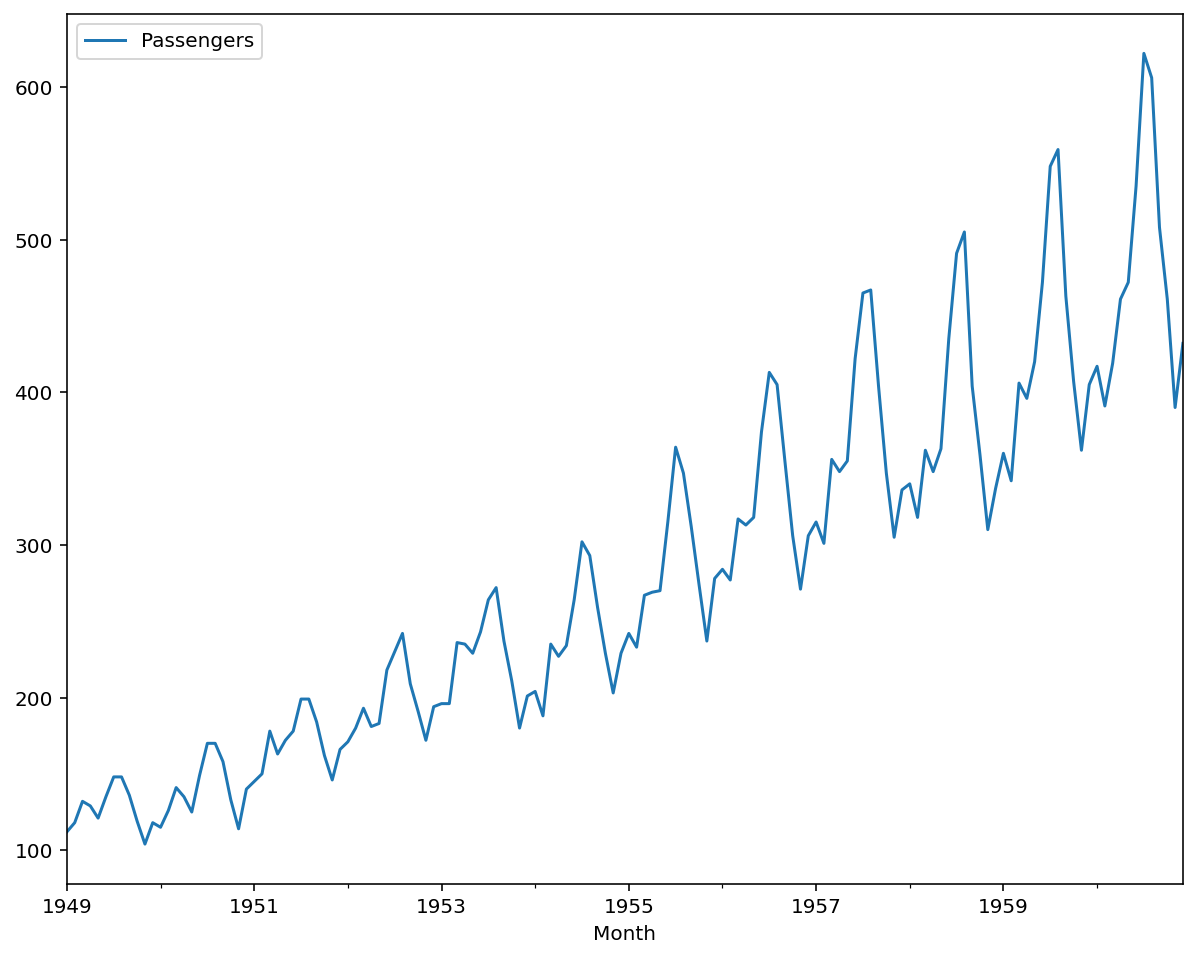

In [33]:
df.plot();

[Adfuller docs](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [34]:
adfuller(df['Passengers'])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Интересуют лишь два первых элемента списка:
* adf - The test statistic.
* pvalue - MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).

In [35]:
def adf(x, threshold=0.05):
    results = adfuller(x)
    
    print('Test-Statistic:', results[0])
    print('P-Value:', results[1])
    
    if results[1] < threshold:
        print('Stationary!')
    else:
        print('Non-Stationary')

In [36]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060482
P-Value: 0.991880243437641
Non-Stationary


### Проверка распределений случайных величин

Нормальное распределение

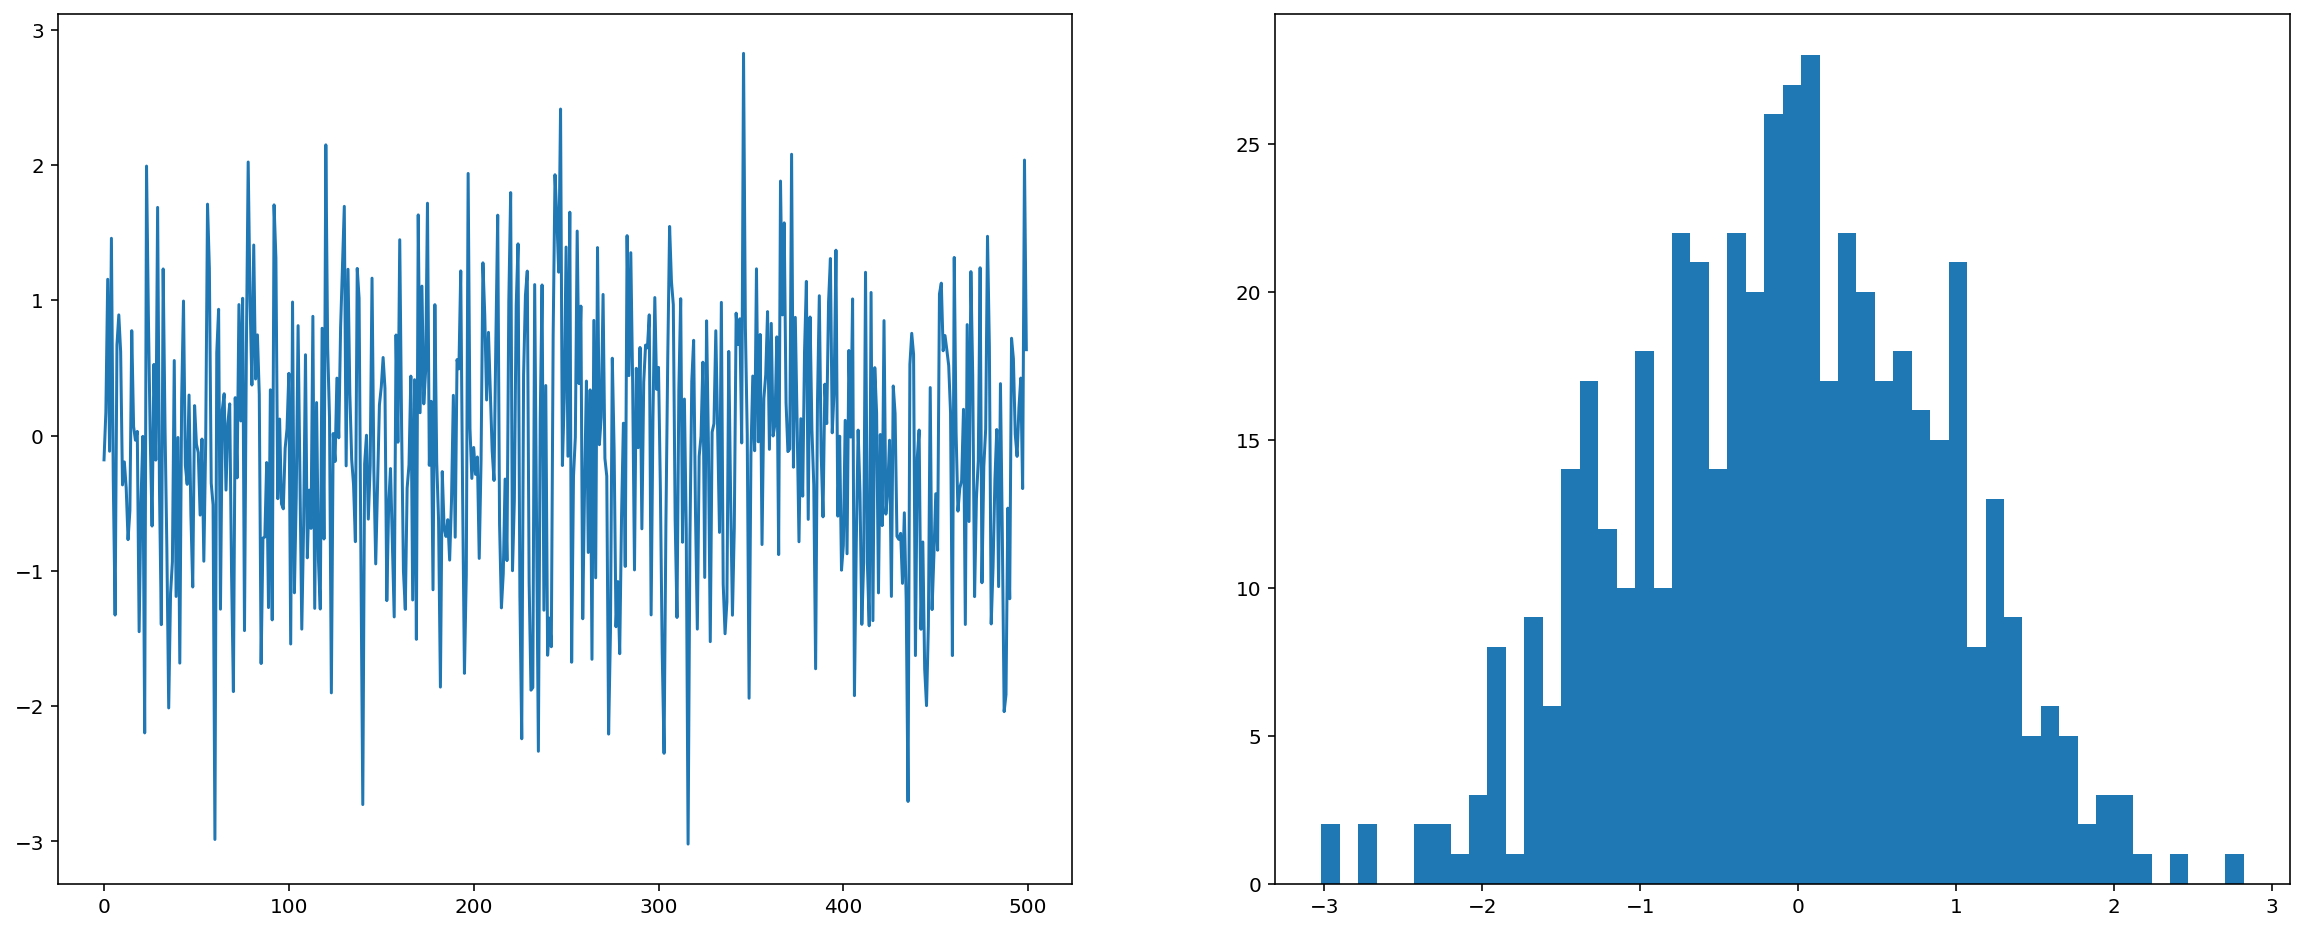

In [37]:
standart_normal = np.random.randn(500)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot(standart_normal)
ax[1].hist(standart_normal, 50)
plt.show()

In [38]:
adf(standart_normal)

Test-Statistic: -19.938637009910103
P-Value: 0.0
Stationary!


Гамма-распределение. Напоминает лог-нормальное распределение 

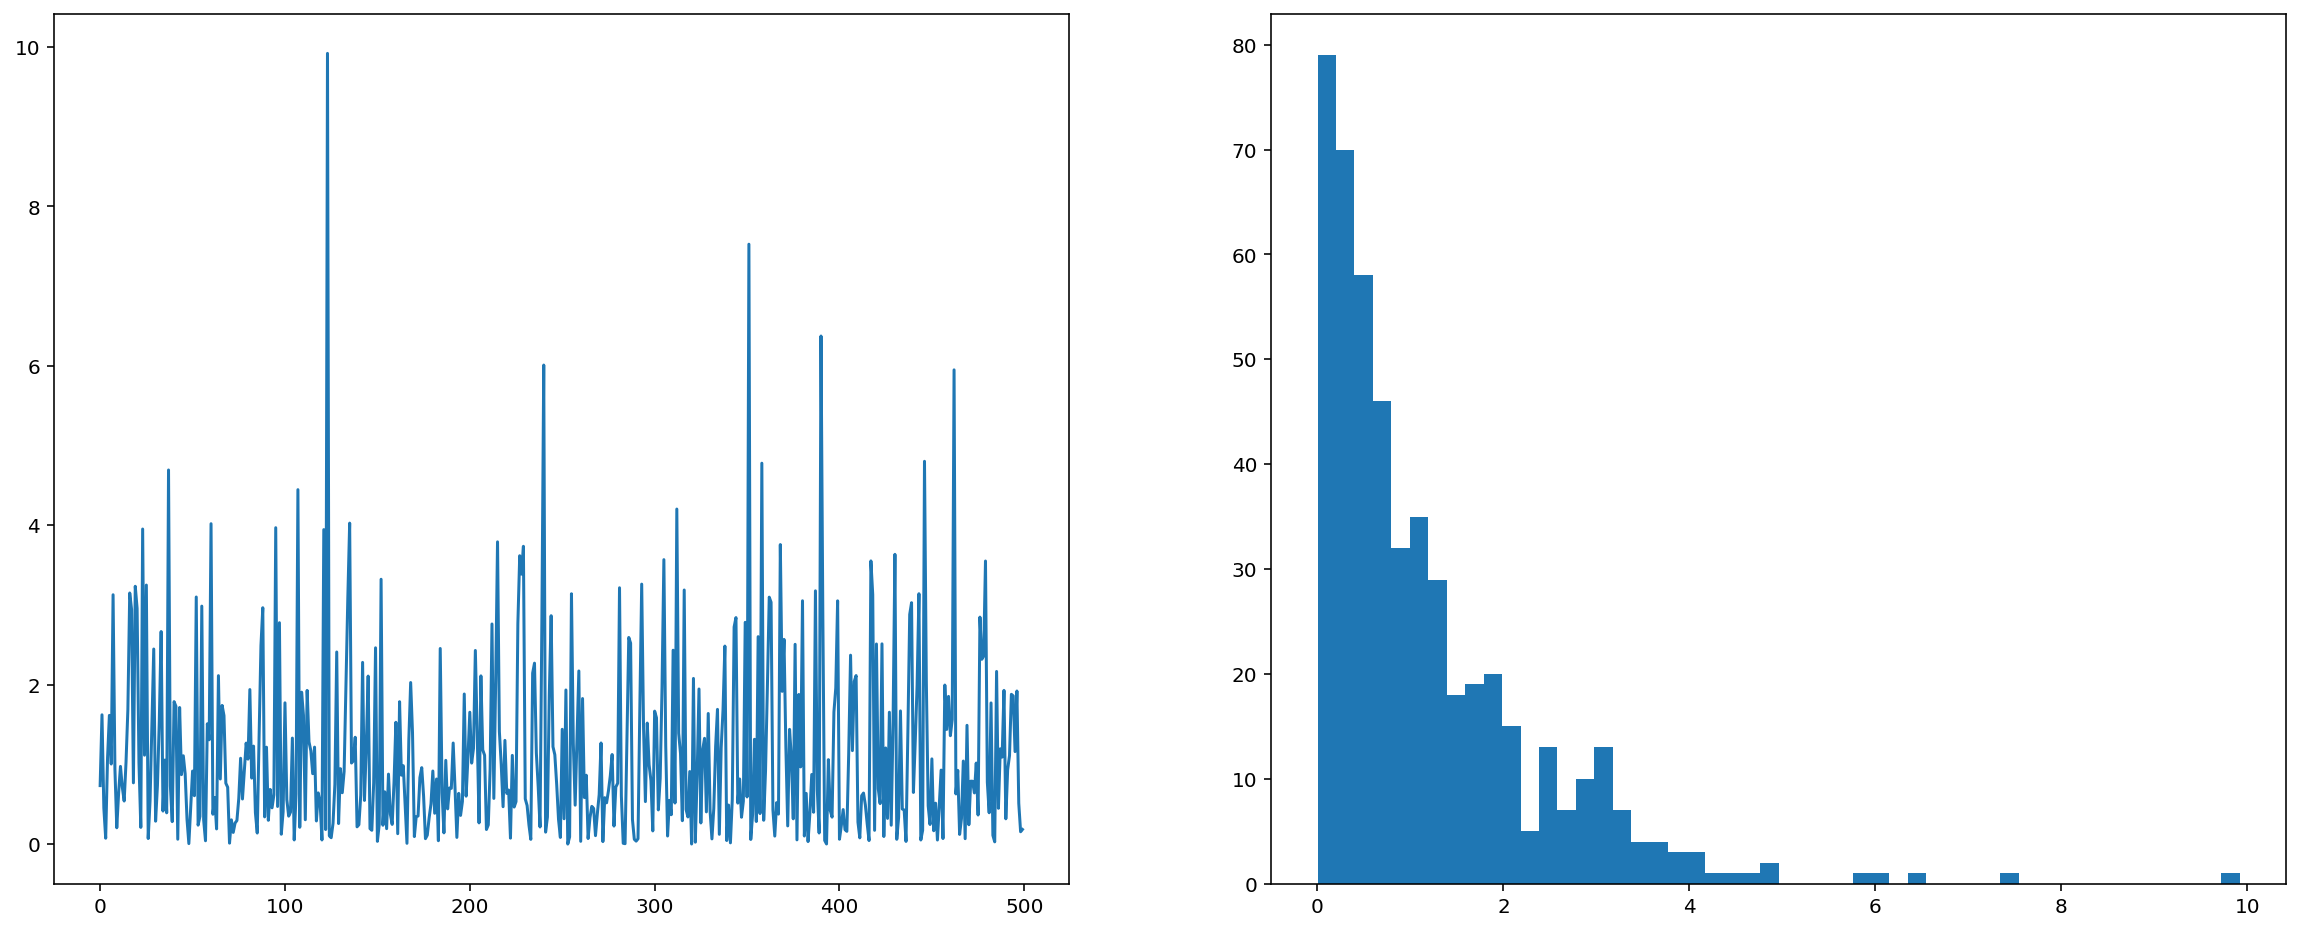

In [39]:
gamma = np.random.gamma(1, 1, 500)
# gamma = np.log(gamma) # позволяет уйти к нормальному распределению
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot(gamma)
ax[1].hist(gamma, 50)
plt.show()

In [40]:
adf(gamma)

Test-Statistic: -5.500589156742621
P-Value: 2.07561188157408e-06
Stationary!


## Исследование авиаперелетов

In [41]:
df['Log_Passengers'] = np.log(df['Passengers'])

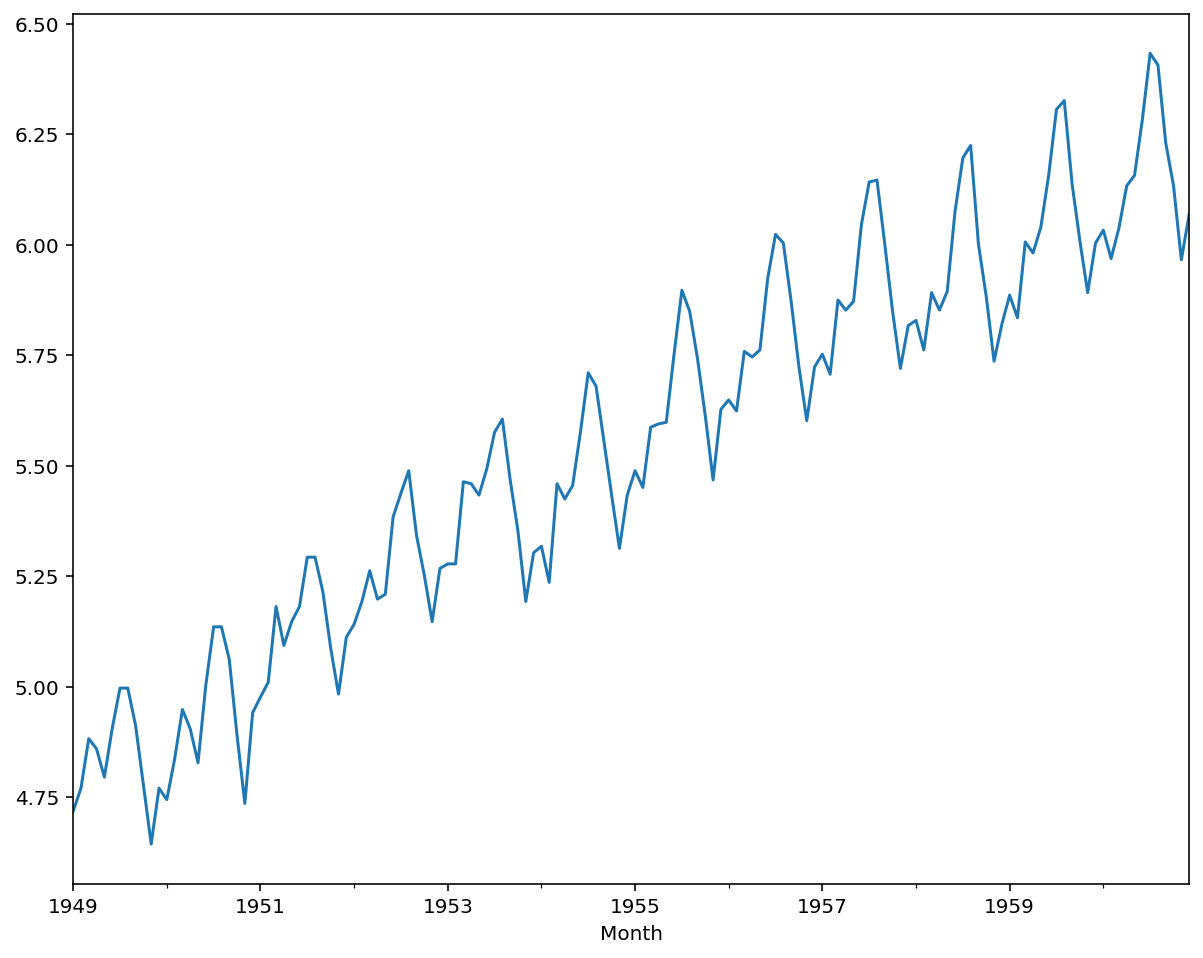

In [42]:
df['Log_Passengers'].plot();

In [43]:
adf(df['Log_Passengers'])

Test-Statistic: -1.7170170891069607
P-Value: 0.42236677477039125
Non-Stationary


In [44]:
df['First_Diff'] = df['Passengers'].diff()
df['Log_First_Diff'] = df['Log_Passengers'].diff()
df.dropna(inplace=True)

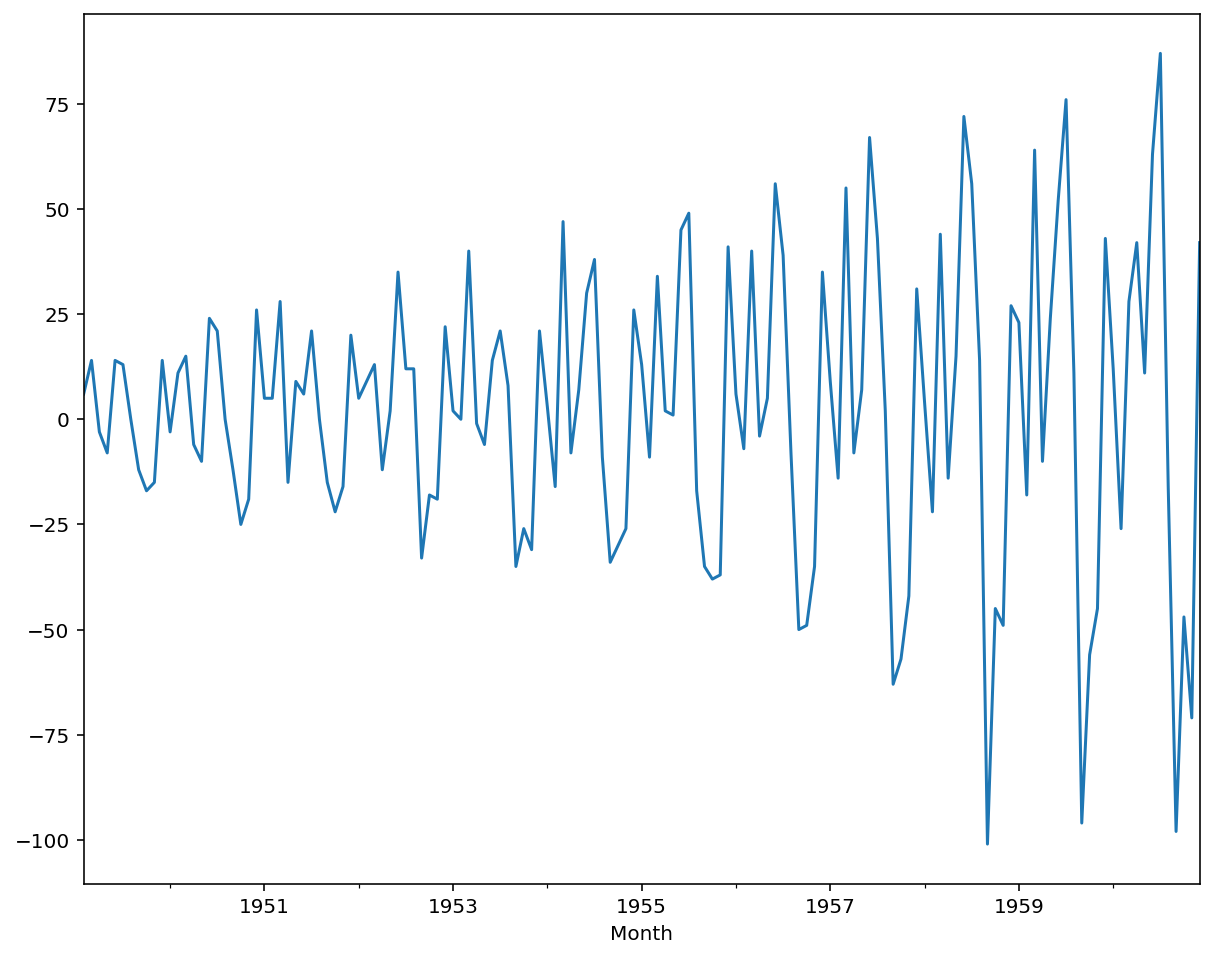

In [45]:
df['First_Diff'].plot();

In [46]:
adf(df['First_Diff'])

Test-Statistic: -2.8292668241699994
P-Value: 0.0542132902838255
Non-Stationary


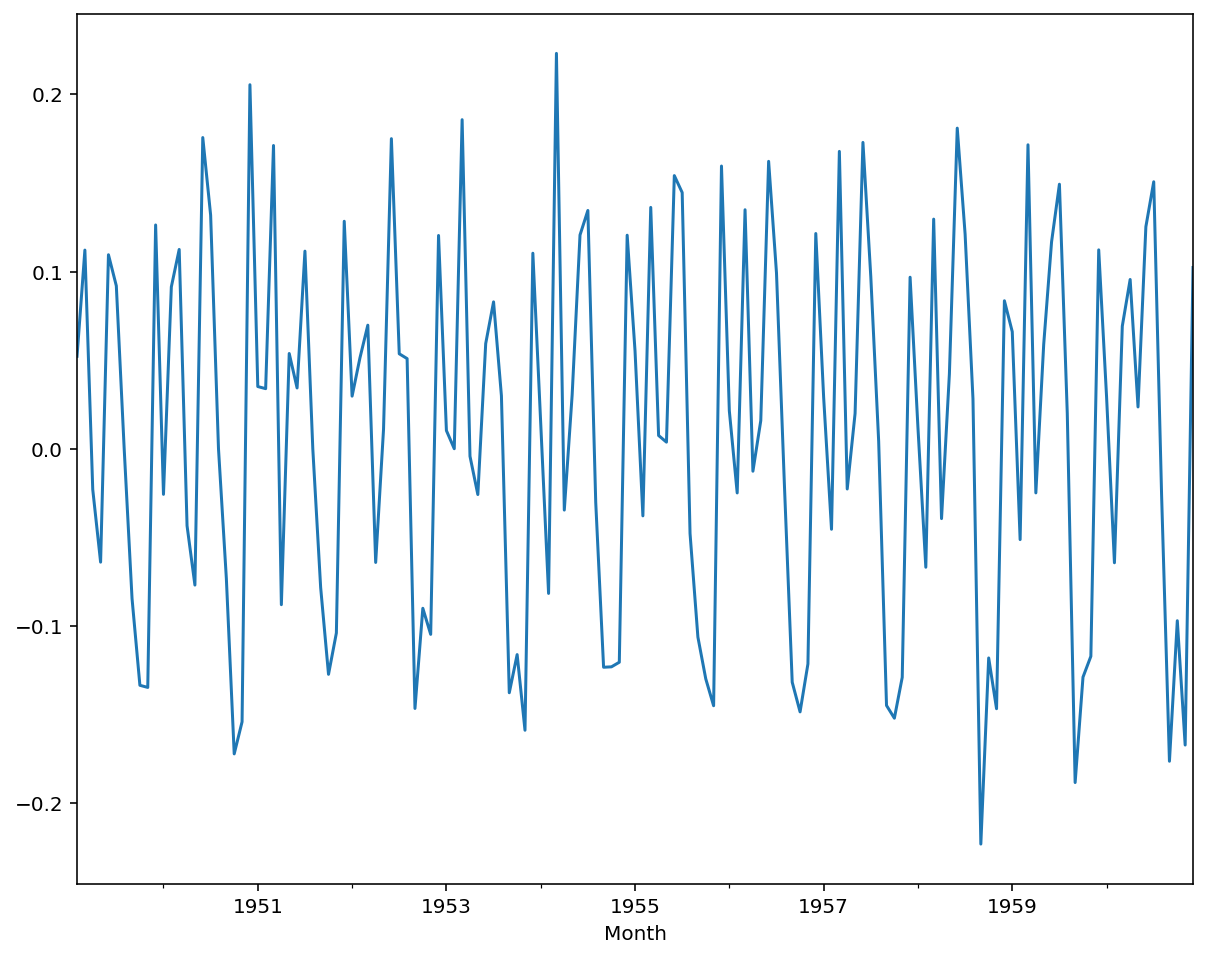

In [47]:
df['Log_First_Diff'].plot();

In [48]:
adf(df['Log_First_Diff'])

Test-Statistic: -2.717130598388133
P-Value: 0.07112054815085875
Non-Stationary


Ряд так и остался нестационарным. Хотя на последнем графике казалось что он уже вполне себе стационарен.

## Stock Prices

In [49]:
stock_df = pd.read_csv('../sp500sub.csv', index_col='Date', parse_dates=True)

In [50]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


In [51]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225077 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225077 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


In [52]:
close_df = stock_df[stock_df['Name'] == 'GOOG'][['Close']]

In [53]:
close_df

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956
...,...
2018-12-21,979.539978
2018-12-24,976.219971
2018-12-26,1039.459961


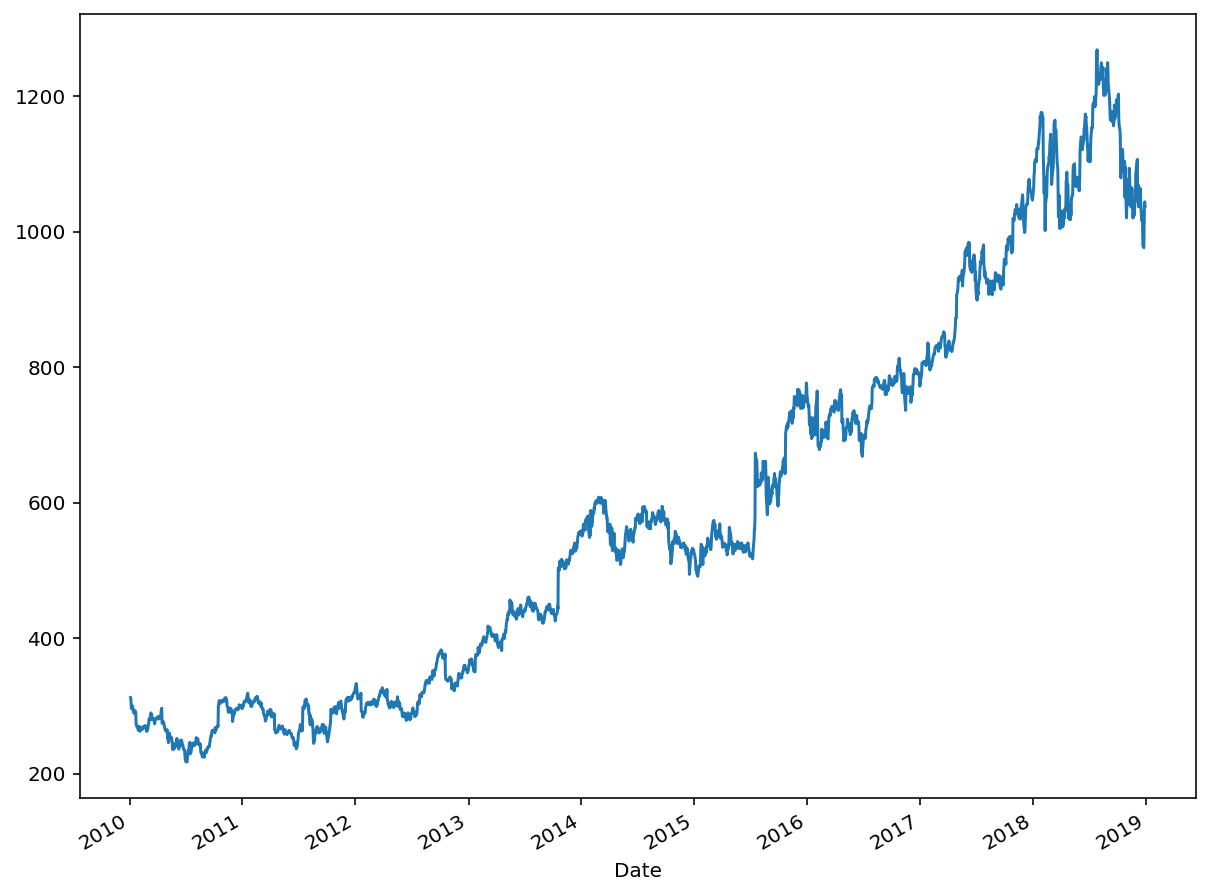

In [54]:
close_df['Close'].plot();

In [55]:
adf(close_df['Close'])

Test-Statistic: -0.09329881527671452
P-Value: 0.9501019204142659
Non-Stationary


In [56]:
close_df['Log_Close'] = np.log(close_df['Close'])

Test-Statistic: -0.4181902578906113
P-Value: 0.907017067749841
Non-Stationary


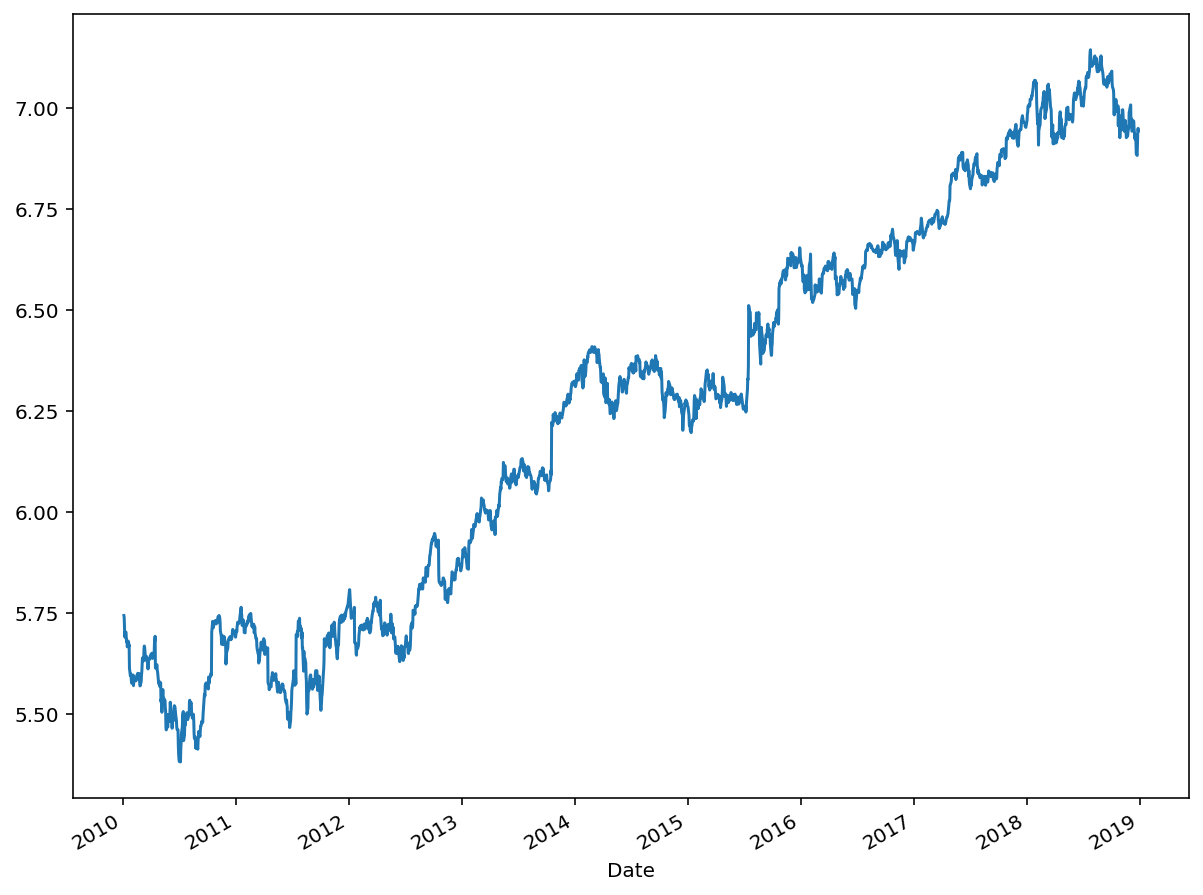

In [57]:
close_df['Log_Close'].plot();
adf(close_df['Log_Close'])

In [58]:
close_df['First_Diff'] = close_df['Close'].diff()
close_df['Log_First_Diff'] = close_df['Log_Close'].diff()
close_df.dropna(inplace=True)

Test-Statistic: -8.83716861417843
P-Value: 1.7067429223208117e-14
Stationary!


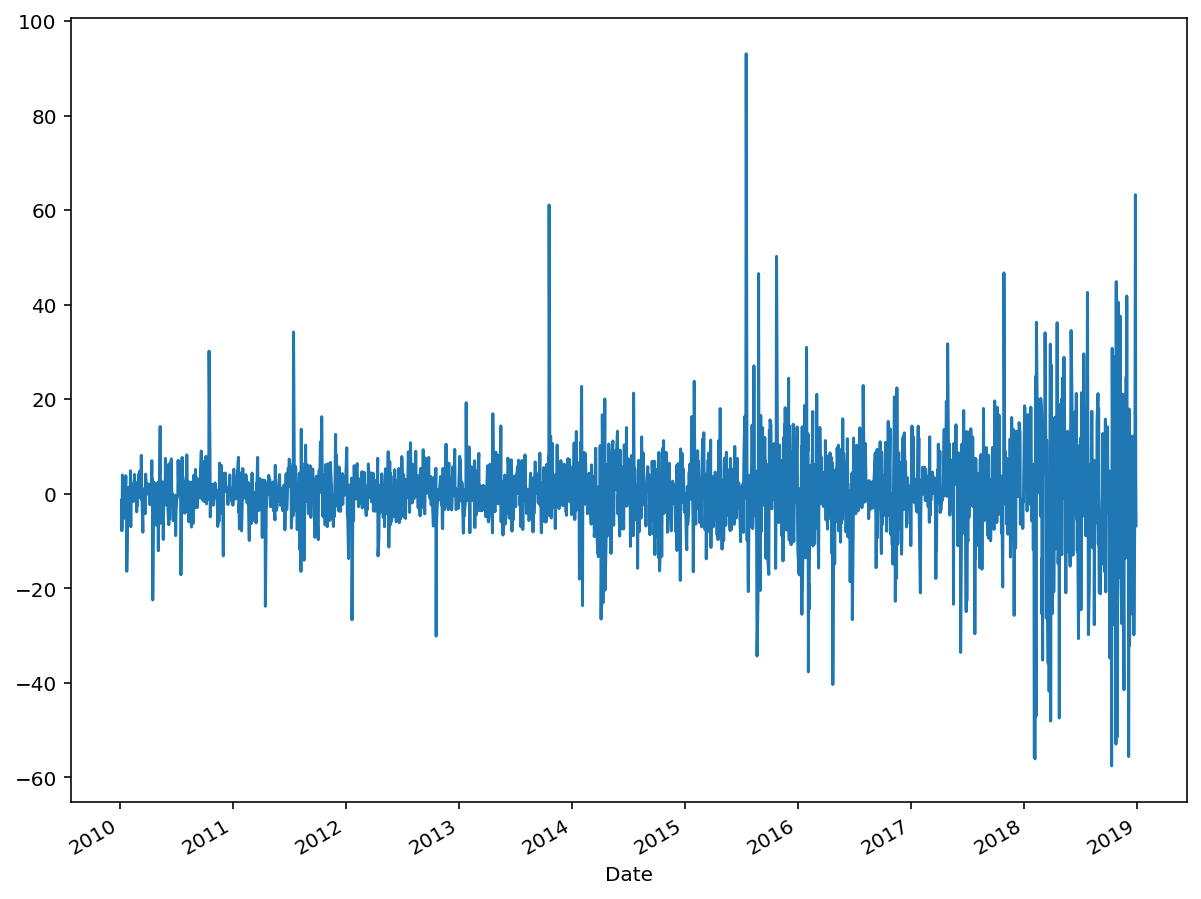

In [59]:
close_df['First_Diff'].plot();
adf(close_df['First_Diff'])

Test-Statistic: -46.66748022773676
P-Value: 0.0
Stationary!


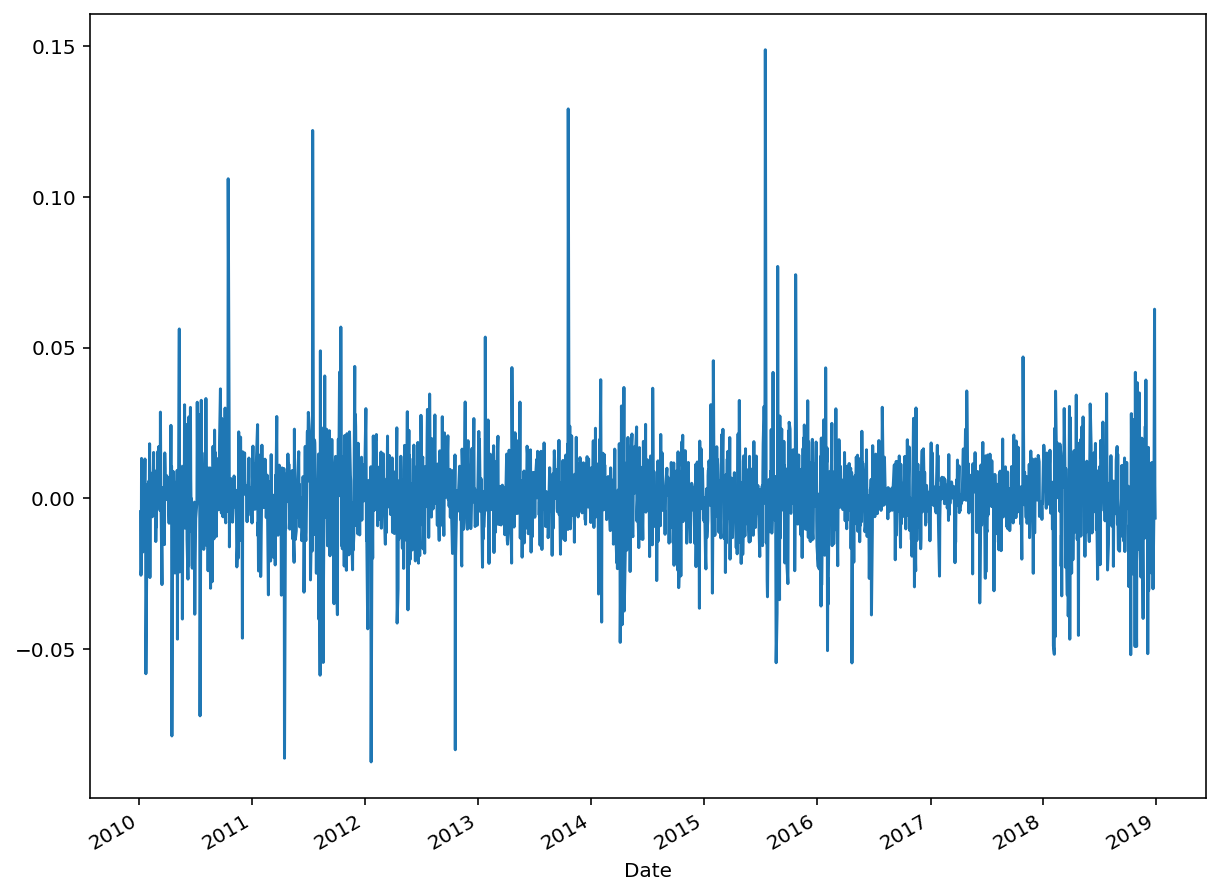

In [60]:
close_df['Log_First_Diff'].plot();
adf(close_df['Log_First_Diff'])

### Исследование ETH

In [71]:
data = pd.read_parquet('../../ETH-Full-1H.parquet')

In [72]:
df = data[['Close']].copy()

Test-Statistic: -1.4988661164619612
P-Value: 0.5340721801256408
Non-Stationary


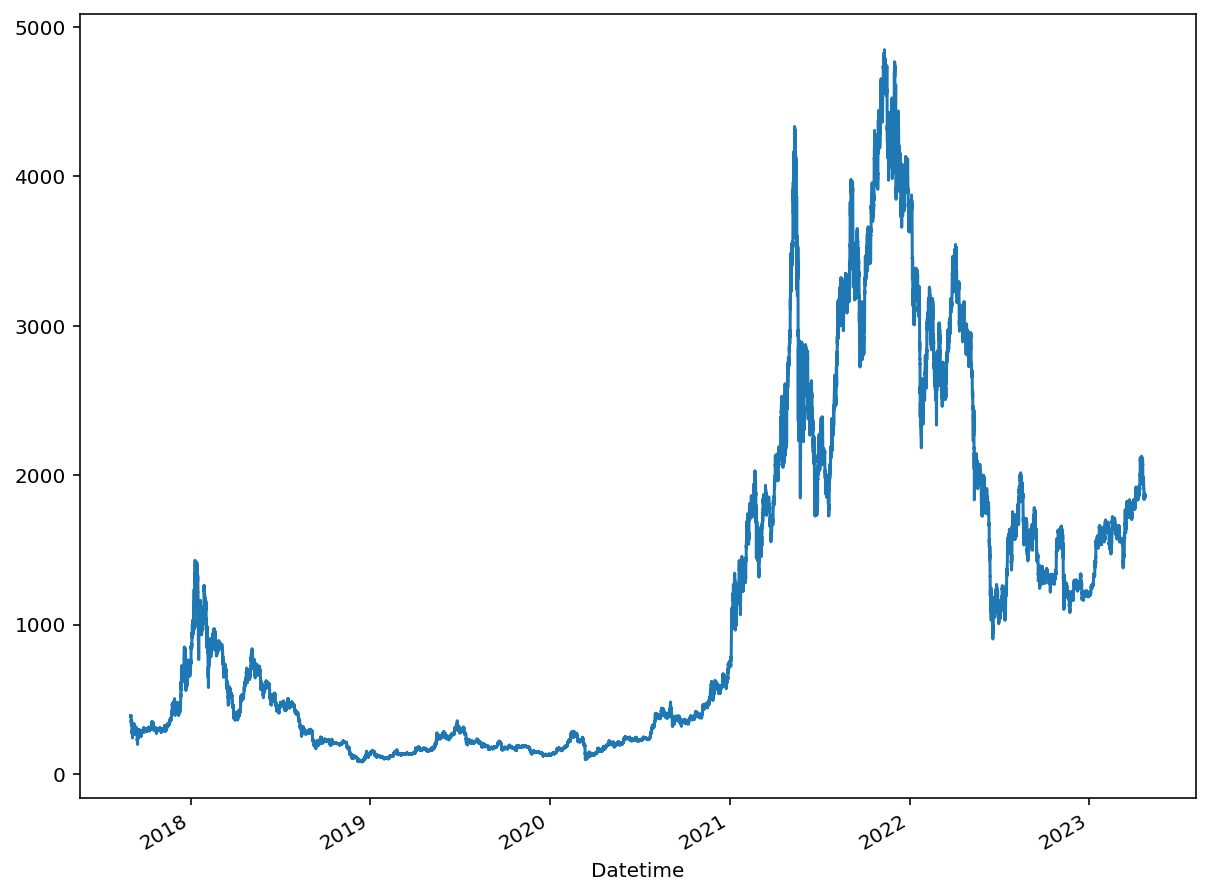

In [73]:
df['Close'].plot();
adf(df['Close'])

In [74]:
df['Log_Close'] = np.log(df['Close'])

Test-Statistic: -0.8629468466854617
P-Value: 0.7999296049521851
Non-Stationary


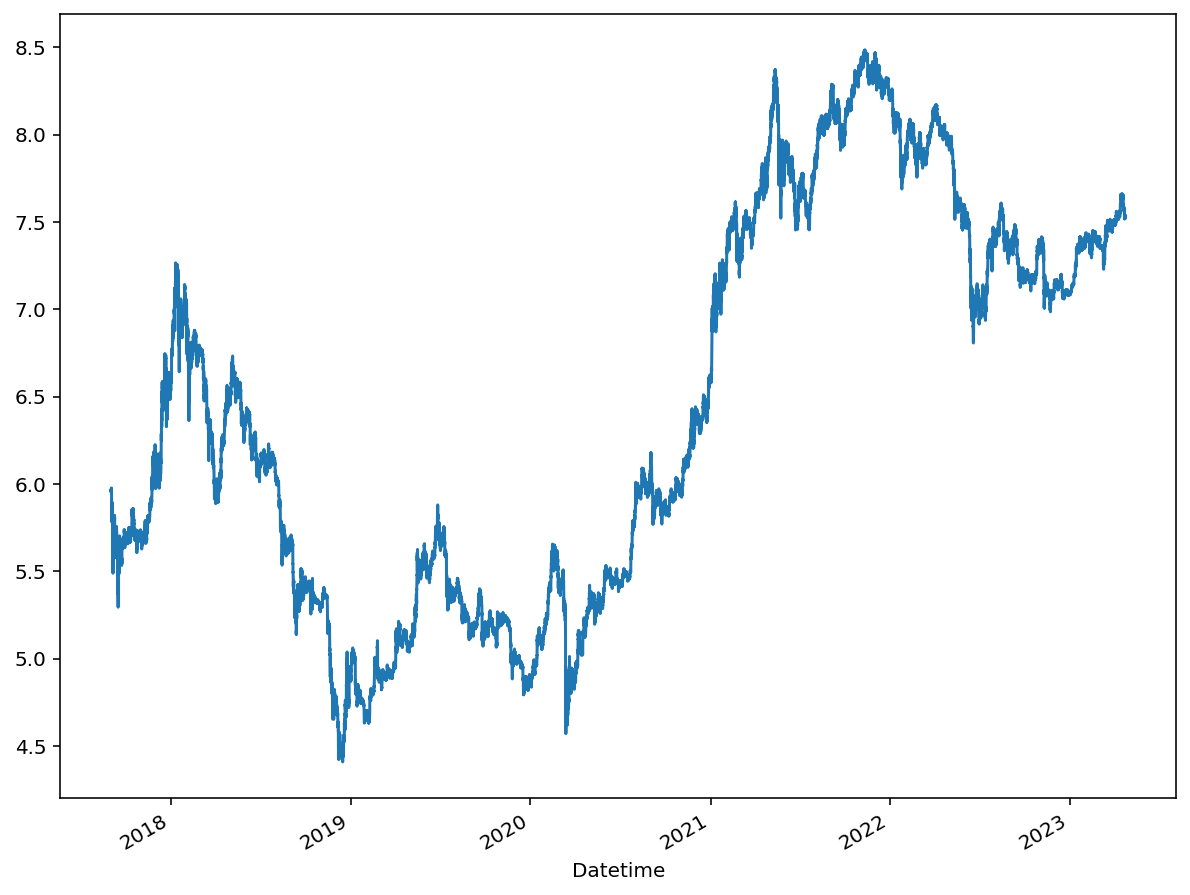

In [75]:
df['Log_Close'].plot();
adf(df['Log_Close'])

In [76]:
df['First_Diff'] = df['Close'].diff()
df['Log_First_Diff'] = df['Log_Close'].diff()
df.dropna(inplace=True)

Test-Statistic: -28.582030741617118
P-Value: 0.0
Stationary!


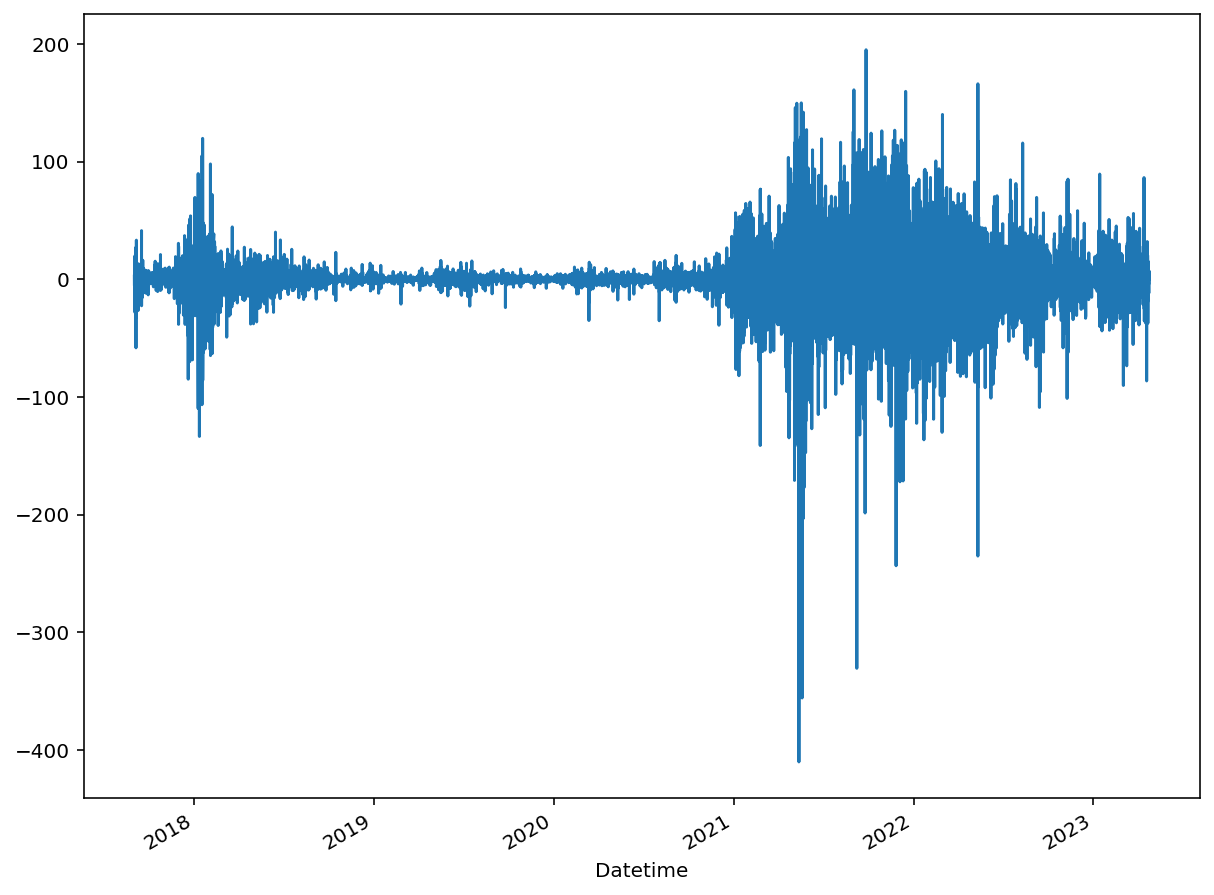

In [77]:
df['First_Diff'].plot();
adf(df['First_Diff'])

Test-Statistic: -30.70747946759708
P-Value: 0.0
Stationary!


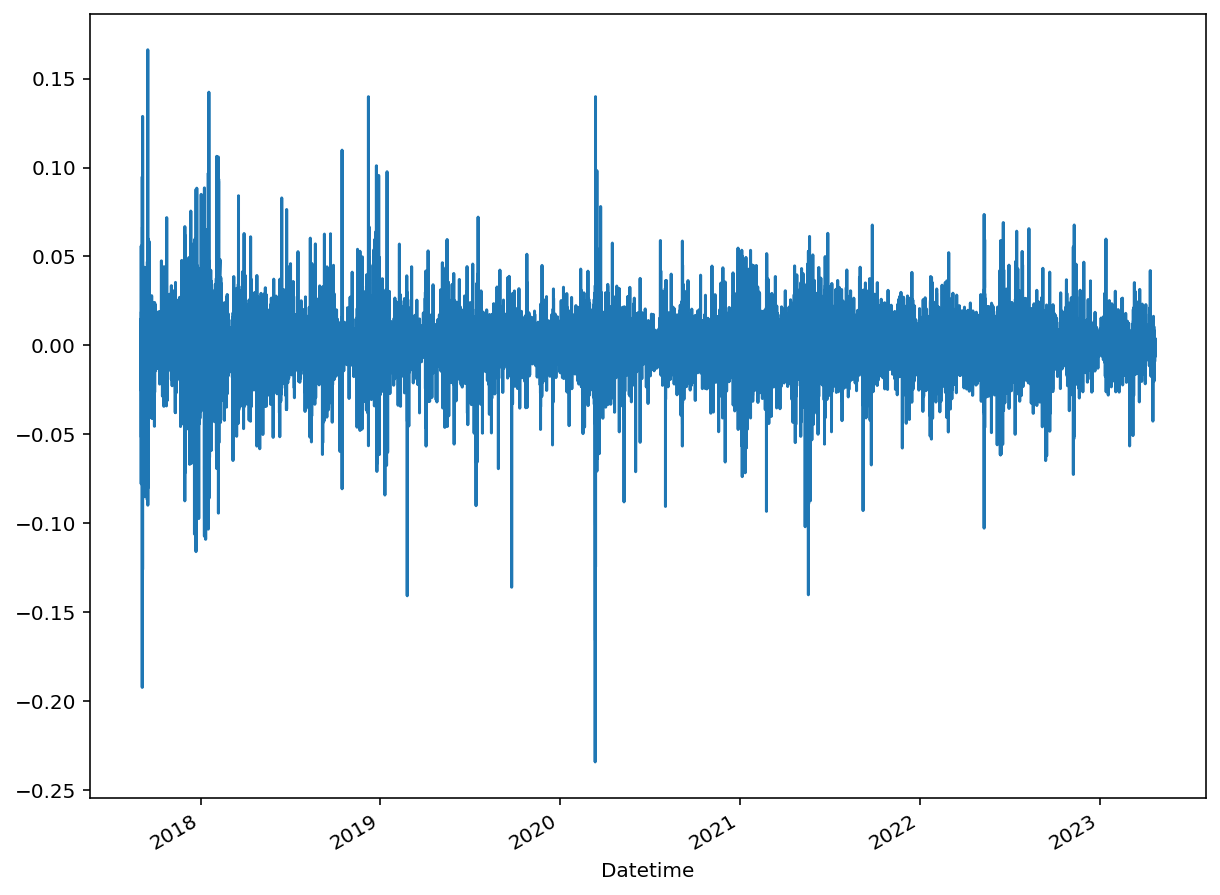

In [78]:
df['Log_First_Diff'].plot();
adf(df['Log_First_Diff'])

ETH становится стационарным уже на первой разнице обычной цены.

А вот Log_Return выглядит лучше, тут дисперсия меньше.